# Import Library

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures



# Import Dataset

In [38]:
df = pd.read_csv('./feature_store/merged.csv', index_col=0)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 0 to 1909
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cycle_id             1906 non-null   float64
 1   start_weight         1906 non-null   float64
 2   last_weight          1906 non-null   float64
 3   average_weight       1906 non-null   float64
 4   average_adg          1906 non-null   float64
 5   fasting              1906 non-null   bool   
 6   pond_id              1906 non-null   float64
 7   measured_date        1906 non-null   object 
 8   morning_temperature  1906 non-null   float64
 9   evening_temperature  1906 non-null   float64
 10  morning_do           1906 non-null   float64
 11  evening_do           1906 non-null   float64
 12  morning_salinity     1906 non-null   float64
 13  morning_pH           1906 non-null   float64
 14  transparency         1906 non-null   float64
 15  long_cycle           1906 non-null   int64 

In [40]:
df.head()

,cycle_id,start_weight,last_weight,average_weight,average_adg,fasting,pond_id,measured_date,morning_temperature,evening_temperature,...,evening_do,morning_salinity,morning_pH,transparency,long_cycle,total_seed,area,size,weight,num_of_harvest
0,3458.0,5.23,25.18,14.428,0.270,True,12969.0,2023-01-09 12:25:06.976744192,28.0,30.0,...,5.64,23.0,7.9,38.0,112,566669.0,4968.0,63.750000,1845.732500,4.0
1,3459.0,4.95,26.59,15.167,0.267,True,12996.0,2023-01-09 12:25:06.976744192,28.0,30.0,...,5.64,23.0,7.9,38.0,121,566669.0,4968.0,64.000000,1863.510000,4.0
2,4038.0,5.25,16.25,10.725,0.281,True,14334.0,2023-01-09 12:25:06.976744192,28.0,30.0,...,5.64,23.0,7.9,38.0,94,350000.0,2700.0,89.000000,1086.976667,6.0
3,4039.0,5.40,15.70,11.035,0.273,True,14335.0,2023-01-09 12:25:06.976744192,28.0,30.0,...,5.64,23.0,7.9,38.0,94,210000.0,1030.0,109.200000,590.508000,5.0
4,4044.0,2.77,24.76,13.033,0.256,True,14348.0,2023-01-09 12:25:06.976744192,28.0,30.0,...,5.64,23.0,7.9,38.0,119,215858.0,1250.0,70.857143,506.297143,7.0


# Preprocessing

In [41]:
df = df.drop(columns=["cycle_id", "pond_id", "measured_date"], axis=1)

In [42]:
df['fasting'] = df['fasting'].replace({True: 1, False: 0})


/var/folders/zz/htmnld_148b1dbm4wj_hyrq80000gn/T/ipykernel_64560/232860989.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fasting'] = df['fasting'].replace({True: 1, False: 0})


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 0 to 1909
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   start_weight         1906 non-null   float64
 1   last_weight          1906 non-null   float64
 2   average_weight       1906 non-null   float64
 3   average_adg          1906 non-null   float64
 4   fasting              1906 non-null   int64  
 5   morning_temperature  1906 non-null   float64
 6   evening_temperature  1906 non-null   float64
 7   morning_do           1906 non-null   float64
 8   evening_do           1906 non-null   float64
 9   morning_salinity     1906 non-null   float64
 10  morning_pH           1906 non-null   float64
 11  transparency         1906 non-null   float64
 12  long_cycle           1906 non-null   int64  
 13  total_seed           1906 non-null   float64
 14  area                 1906 non-null   float64
 15  size                 1906 non-null   float6

# Feature Selection

## Mutual Information

In [44]:
target_column = 'average_adg'

In [45]:
# Mendefinisikan fitur dan variabel target
X = df.drop(target_column, axis=1)  # Fitur
y = df[target_column]  # Variabel target


In [46]:
# Menghitung informasi mutual
mi = mutual_info_regression(X, y, random_state=69)

In [47]:
mi_score = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print(mi_score)

average_weight         0.286023
last_weight            0.283015
size                   0.269980
start_weight           0.150300
long_cycle             0.093424
morning_salinity       0.074241
num_of_harvest         0.072455
morning_temperature    0.061878
total_seed             0.052857
weight                 0.051184
evening_do             0.045641
morning_pH             0.042245
morning_do             0.036917
area                   0.036127
evening_temperature    0.015473
transparency           0.002977
fasting                0.000000
dtype: float64


### Table Mutual Infomation
<a name="tbl-mutual-information"></a>

In [48]:
mi_score_style = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_score_style = mi_score_style.sort_values(by='Mutual Information', ascending=False)

mi_score_style.style.background_gradient(low=0.7, high=1.0,cmap='YlOrRd')

,Feature,Mutual Information
2,average_weight,0.286023
1,last_weight,0.283015
14,size,0.269980
0,start_weight,0.150300
11,long_cycle,0.093424
8,morning_salinity,0.074241
16,num_of_harvest,0.072455
4,morning_temperature,0.061878
12,total_seed,0.052857
15,weight,0.051184


# Feature Engineering

## Mathematical Transformations

In [49]:
top_features = mi_score.index[:5] 

In [50]:
# MEMBUAT POLYNOMIAL FEATURES

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X[top_features])
poly_feature_names = poly.get_feature_names_out(top_features)

In [59]:
poly_feature_names

array(['average_weight', 'last_weight', 'size', 'start_weight',
       'long_cycle', 'average_weight^2', 'average_weight last_weight',
       'average_weight size', 'average_weight start_weight',
       'average_weight long_cycle', 'last_weight^2', 'last_weight size',
       'last_weight start_weight', 'last_weight long_cycle', 'size^2',
       'size start_weight', 'size long_cycle', 'start_weight^2',
       'start_weight long_cycle', 'long_cycle^2'], dtype=object)

In [51]:
# MEMBUAT DF DENGAN POLYNOMIAL FEATURES

poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

In [52]:
# TAMBAH FEATURES POLY KE DF UTAMA

data_with_poly_features = pd.concat([df, poly_df], axis=1)

In [53]:
data_with_poly_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1910 entries, 0 to 713
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   start_weight                 1906 non-null   float64
 1   last_weight                  1906 non-null   float64
 2   average_weight               1906 non-null   float64
 3   average_adg                  1906 non-null   float64
 4   fasting                      1906 non-null   float64
 5   morning_temperature          1906 non-null   float64
 6   evening_temperature          1906 non-null   float64
 7   morning_do                   1906 non-null   float64
 8   evening_do                   1906 non-null   float64
 9   morning_salinity             1906 non-null   float64
 10  morning_pH                   1906 non-null   float64
 11  transparency                 1906 non-null   float64
 12  long_cycle                   1906 non-null   float64
 13  total_seed              

In [54]:
data_with_poly_features.head()

,start_weight,last_weight,average_weight,average_adg,fasting,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,...,last_weight^2,last_weight size,last_weight start_weight,last_weight long_cycle,size^2,size start_weight,size long_cycle,start_weight^2,start_weight long_cycle,long_cycle^2
0,5.23,25.18,14.428,0.270,1.0,28.0,30.0,4.97,5.64,23.0,...,634.0324,1605.225000,131.6914,2820.16,4064.062500,333.412500,7140.0,27.3529,585.76,12544.0
1,4.95,26.59,15.167,0.267,1.0,28.0,30.0,4.97,5.64,23.0,...,707.0281,1701.760000,131.6205,3217.39,4096.000000,316.800000,7744.0,24.5025,598.95,14641.0
2,5.25,16.25,10.725,0.281,1.0,28.0,30.0,4.97,5.64,23.0,...,264.0625,1446.250000,85.3125,1527.50,7921.000000,467.250000,8366.0,27.5625,493.50,8836.0
3,5.40,15.70,11.035,0.273,1.0,28.0,30.0,4.97,5.64,23.0,...,246.4900,1714.440000,84.7800,1475.80,11924.640000,589.680000,10264.8,29.1600,507.60,8836.0
4,2.77,24.76,13.033,0.256,1.0,28.0,30.0,4.97,5.64,23.0,...,613.0576,1754.422857,68.5852,2946.44,5020.734694,196.274286,8432.0,7.6729,329.63,14161.0


In [60]:
data_with_poly_features.to_csv("./feature_store/polynomial-features.csv")

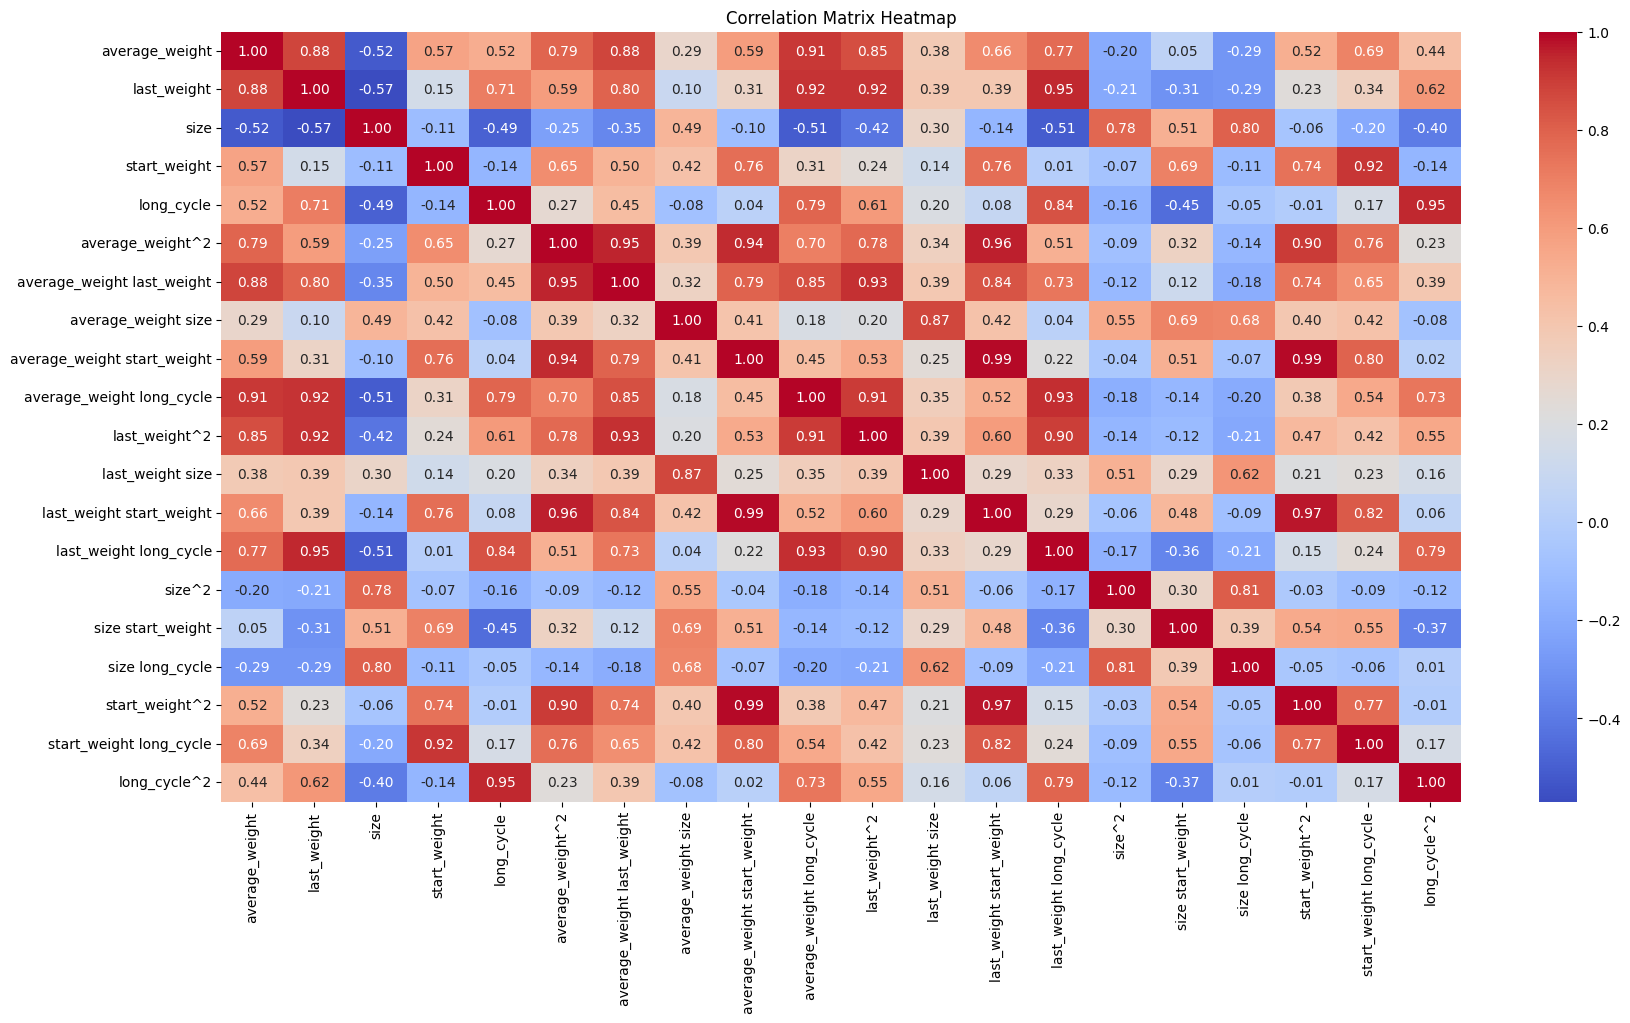

In [61]:
plt.figure(figsize=(20, 10))
correlation_matrix = poly_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Conclusion
---

1. Fitur yang didapatkan
- Mutual information menghasilkan nilai `mi` [table mutual information](#tbl-mutual-information)
- Angka Mutual Information (MI) dalam tabel tersebut mewakili seberapa banyak informasi yang dimiliki oleh setiap fitur tentang target variabel
- Target variable menggunakan fitur `average_adg`
- Fitur-fitur yang paling informatif: `[average_weight, last_weight, start_weight, size, long_cycle]`. Fitur-fitur ini mungkin sangat penting untuk model prediksi Anda dan sebaiknya diprioritaskan dalam pemilihan fitur.
- Fitur dengan kontribusi informasi rendah: Fitur-fitur seperti fasting yang memiliki nilai Mutual Information sangat rendah atau nol mungkin tidak relevan dan bisa dipertimbangkan untuk diabaikan dalam model prediksi.
- Kami menggunakan 5 fitur terbaik.


3. Identifikasi fitur baru dari 5 fitur terbaik
- Pada proses mutual information menggunakan `transformasi matematika`
- Proses transform menggunakan proses perkalian antar fitur terpilih dan fitur itu sendiri.
- kemudian akan menghasilkan fitur baru seperti pada [chart](#chrt-math-transform)

github : https://github.com/sugengdcahyo/shrimp-prediction/blob/main/02-Filter%20Based%20Feature%20Selection.ipynb